# 畳み込みの学習

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

label 1.0


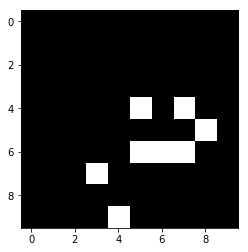

label 0.0


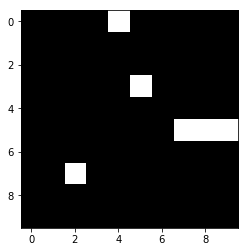

In [2]:
# 画像読み込み
imgs = np.array([ cv2.imread("face/%03d.png" %i , 0 ) for i in range(200)])
labels = np.loadtxt("face/labels.txt")

print("label", labels[2])
plt.imshow( imgs[2], cmap="gray" )
plt.show()

print("label", labels[0])
plt.imshow( imgs[0], cmap="gray" )
plt.show()

## ここでの課題
上記の1枚目の画像のように顔形状パターンが含まれている画像にはラベル1が，二枚目のように顔形状パターンが含まれていない画像にはラベル0が与えられているます．
これらの画像2クラス（顔形状があるorない）に分類する畳み込みニューラルネットを学習することで，どのような特徴を抽出するフィルタが学習されるかを確認します．

## ネットワーク構造
画像→[畳み込み]→[ReLU]→[MAXプーリング（最大値をひとつだけ取る）]→[Sigmoid]→ 0 or 1

In [3]:
# 画像
x = tf.placeholder(tf.float32,shape=[None,10, 10])

# データ数，高さ，幅，チャンネル数に変換
x_image = tf.reshape(x, [-1,10,10,1])

# 重みとバイアスを定義
# (高さ，幅，チャンネル数, フィルタ数)
W = tf.Variable( tf.truncated_normal([5,5,1,1], stddev=0.1 ) )
b = tf.Variable( tf.zeros([1]) )

# 畳み込み
h_conv = tf.nn.conv2d(x_image,W,strides=[1,1,1,1],padding='SAME') + b

# RELU
h_relu = tf.nn.relu(h_conv)

# pooling
h_pool =  tf.reduce_max( h_relu, [1,2,3] )

# sigmoidで正規化
y = tf.sigmoid( h_pool )

In [4]:
# 誤差関数（クロスエントロピー）の定義
y_ = tf.placeholder( tf.float32, shape=[None] )
loss = tf.reduce_sum( -y_* tf.log(y) - (1 - y_) * tf.log(1 - y) )

# 最適化手法
train_step = tf.train.AdamOptimizer(0.01).minimize(loss)

正答数： 105
loss： 137.992


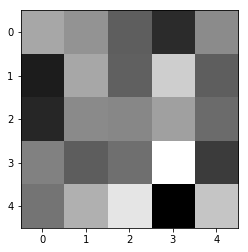

正答数： 171
loss： 89.2997


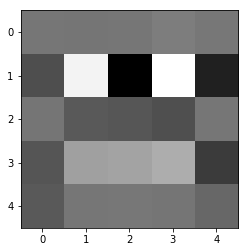

正答数： 174
loss： 80.3356


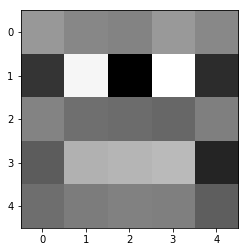

正答数： 179
loss： 75.8387


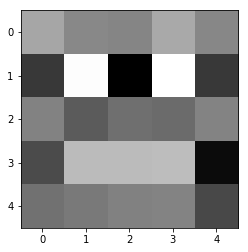

正答数： 194
loss： 73.29


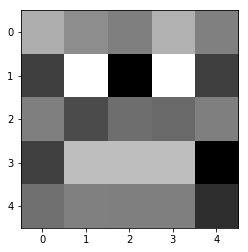

正答数： 195
loss： 71.9348


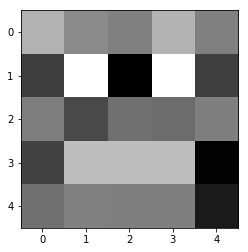

正答数： 193
loss： 71.0301


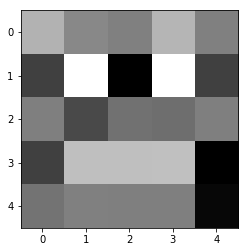

正答数： 192
loss： 70.5117


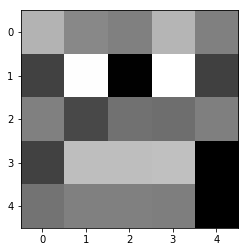

正答数： 198
loss： 70.161


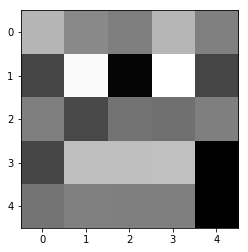

正答数： 192
loss： 69.8887


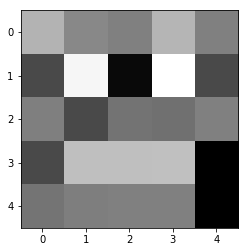

In [6]:
with tf.Session() as sess:
  sess.run( tf.global_variables_initializer() )
  
  # 学習
  feed_dict = {x: imgs, y_:labels}
  for it in range(1000):    

    _, _loss, y_pred = sess.run( [train_step, loss, y], feed_dict=feed_dict )

    if it%100==0:
      print( "正答数：", np.sum((y_pred>0.5)==labels))
      print(  "loss：", _loss )
        
     # 学習された重みを取り出して表示
      _W = sess.run( [W] )[0]
      plt.grid(False)
      plt.imshow( _W.reshape(5,5), cmap="gray" )
      plt.show()
      

上記のように，顔がある・なしを識別するネットワークを学習すると，顔の形状パターンを捉えるような重みが自動的に学習される．